In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
df = pd.read_csv('cardata1.csv')
df.drop('Unnamed: 0', axis=1, inplace =True)
df['age'] = df['Year of Manufacture'].apply(lambda x: 2022-float(x))

In [6]:
# Extract kenyan used cars
filt_kenya = df['Condition']=='Kenyan Used'
df=df.loc[filt_kenya]
df.shape

(4099, 13)

In [8]:
df.head()

,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,selling_price,day,boost,date,listing_duration,age
0,Kenyan Used,Toyota,Crown,2012.0,White,Automatic,NaN,1270000.0,Tue,40X Diamond,2022-08-02 11:21:56,14.0,10.0
3,Kenyan Used,Mazda,CX-5,2013.0,Black,AMT,92929.0,1720000.0,Mon,VIP TOP+,2022-07-25 08:25:10,22.0,9.0
5,Kenyan Used,Nissan,Serena,2008.0,Silver,Automatic,NaN,730000.0,Tue,TOP,2022-08-02 06:35:20,14.0,14.0
6,Kenyan Used,Nissan,Liberty,2008.0,Silver,Automatic,NaN,335000.0,Tue,{},2022-08-02 11:20:16,14.0,14.0
7,Kenyan Used,Toyota,Picnic,2003.0,Gold,Automatic,NaN,550000.0,Tue,{},2022-08-02 11:34:46,14.0,19.0


# Basic Data Exploration

In [10]:
df.describe()

,Year of Manufacture,Mileage,selling_price,listing_duration,age
count,4099.00000,2.957000e+03,4.096000e+03,4099.000000,4099.00000
mean,2010.02342,1.291919e+05,2.314996e+06,42.975116,11.97658
std,4.33250,9.926718e+04,2.200597e+06,40.321952,4.33250
min,1958.00000,7.000000e+03,1.600000e+05,13.000000,1.00000
25%,2008.00000,9.700000e+04,1.050000e+06,21.000000,9.00000
50%,2011.00000,1.200000e+05,1.650000e+06,30.000000,11.00000
75%,2013.00000,1.450000e+05,2.700000e+06,49.000000,14.00000
max,2021.00000,1.980000e+06,4.500000e+07,434.000000,64.00000


From the descrtiption above we see that:
    - The average age of a car is 8.4 years, average mileage is 90K, average price is 2.2M & the average duration is has been on sale is 53 days

In [11]:
# Filter out the major outliers;
min_sp= df['selling_price'].quantile(0.0001)
max_sp = df['selling_price'].quantile(0.999)
# max_mileage = df['Mileage'].quantile(0.999)
filt1= (df['selling_price']>=min_sp) & (df['selling_price']<=max_sp) 
df


,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,selling_price,day,boost,date,listing_duration,age
0,Kenyan Used,Toyota,Crown,2012.0,White,Automatic,NaN,1270000.0,Tue,40X Diamond,2022-08-02 11:21:56,14.0,10.0
3,Kenyan Used,Mazda,CX-5,2013.0,Black,AMT,92929.0,1720000.0,Mon,VIP TOP+,2022-07-25 08:25:10,22.0,9.0
5,Kenyan Used,Nissan,Serena,2008.0,Silver,Automatic,NaN,730000.0,Tue,TOP,2022-08-02 06:35:20,14.0,14.0
6,Kenyan Used,Nissan,Liberty,2008.0,Silver,Automatic,NaN,335000.0,Tue,{},2022-08-02 11:20:16,14.0,14.0
7,Kenyan Used,Toyota,Picnic,2003.0,Gold,Automatic,NaN,550000.0,Tue,{},2022-08-02 11:34:46,14.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17764,Kenyan Used,Mercedes-Benz,E200,2006.0,Burgandy,Automatic,NaN,790000.0,Wed,Diamond,2022-08-03 10:35:55,13.0,16.0
17765,Kenyan Used,Mercedes-Benz,200,1986.0,Gold,Automatic,NaN,2700000.0,Tue,2X VIP TOP+,2022-07-12 07:54:03,35.0,36.0
17767,Kenyan Used,Nissan,Sunny,2005.0,Silver,Automatic,156000.0,860000.0,Mon,Diamond,2022-07-18 11:42:21,29.0,17.0
17772,Kenyan Used,Toyota,Passo,2012.0,Purple,Automatic,93685.0,1980000.0,Sat,{},2022-06-11 06:16:13,66.0,10.0


In [12]:
df.describe()


,Year of Manufacture,Mileage,selling_price,listing_duration,age
count,4099.00000,2.957000e+03,4.096000e+03,4099.000000,4099.00000
mean,2010.02342,1.291919e+05,2.314996e+06,42.975116,11.97658
std,4.33250,9.926718e+04,2.200597e+06,40.321952,4.33250
min,1958.00000,7.000000e+03,1.600000e+05,13.000000,1.00000
25%,2008.00000,9.700000e+04,1.050000e+06,21.000000,9.00000
50%,2011.00000,1.200000e+05,1.650000e+06,30.000000,11.00000
75%,2013.00000,1.450000e+05,2.700000e+06,49.000000,14.00000
max,2021.00000,1.980000e+06,4.500000e+07,434.000000,64.00000


Mean Price = 2.31M
Mean Mileage = 129K
mean age = 11.9 years
mean duration = 42 days






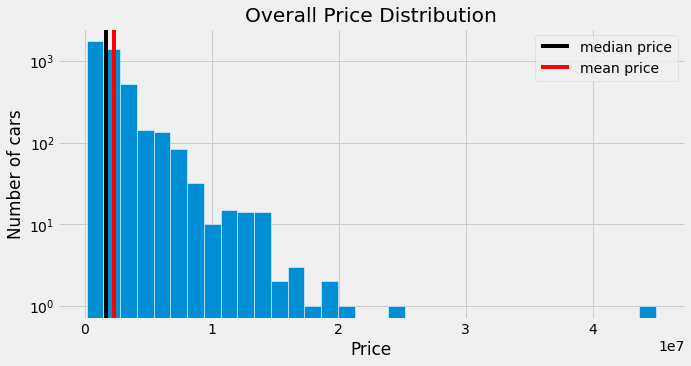

In [13]:
# Price distribution
values = df['selling_price']

plt.title('Overall Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of cars')

#Add the median & mean lines
median_price = df['selling_price'].median()
mean_price = df['selling_price'].mean()
plt.axvline(median_price, color='black', label= 'median price')
plt.axvline(mean_price, color='red', label= 'mean price')

#Plot the hist
plt.legend()
plt.hist(values, bins=34, log=True, edgecolor='white')
plt.show()

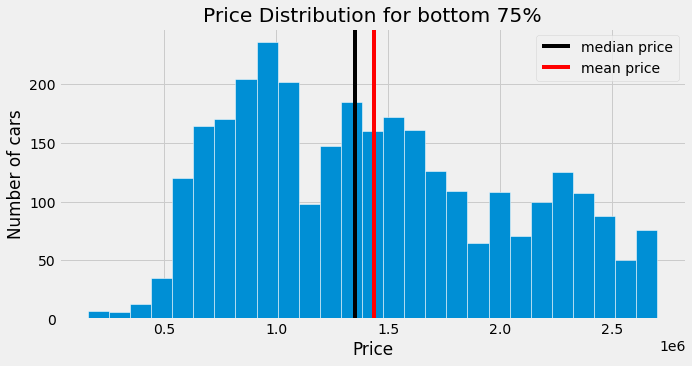

In [15]:
#Price distrinution for cars less than 75th percentile

pct75 = df['selling_price'].quantile(0.75)
filt75 = df['selling_price']<=pct75
values = df.loc[filt75]['selling_price']

plt.title('Price Distribution for bottom 75%')
plt.xlabel('Price')
plt.ylabel('Number of cars')

#Add the median & mean lines
# median_price = df['selling_price'].median()
median_price = values.median()
# mean_price = df['selling_price'].mean()
mean_price = values.mean()
plt.axvline(median_price, color='black', label= 'median price')
plt.axvline(mean_price, color='red', label= 'mean price')

plt.legend()

#Plot the hist
plt.hist(values, bins=27, edgecolor='white')
plt.show()

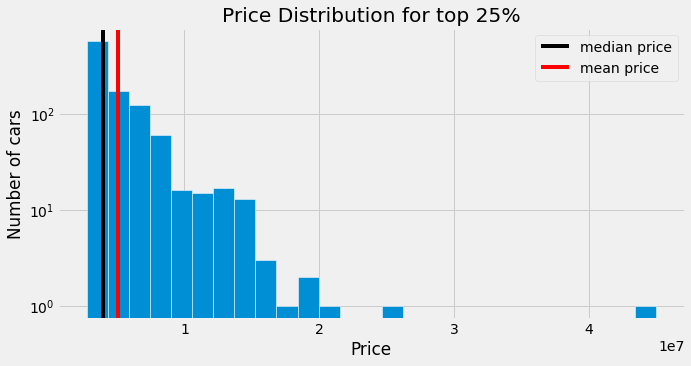

In [16]:
pct75 = df['selling_price'].quantile(0.75)
filt75 = df['selling_price']>pct75
values = df.loc[filt75]['selling_price']

plt.title('Price Distribution for top 25%')
plt.xlabel('Price')
plt.ylabel('Number of cars')

#Add the median & mean lines
# median_price = df['selling_price'].median()
median_price = values.median()
# mean_price = df['selling_price'].mean()
mean_price = values.mean()
plt.axvline(median_price, color='black', label= 'median price')
plt.axvline(mean_price, color='red', label= 'mean price')

#Plot the hist
plt.legend()
plt.hist(values, bins=27,log=True,  edgecolor='white')
plt.show()

Other Distibutions

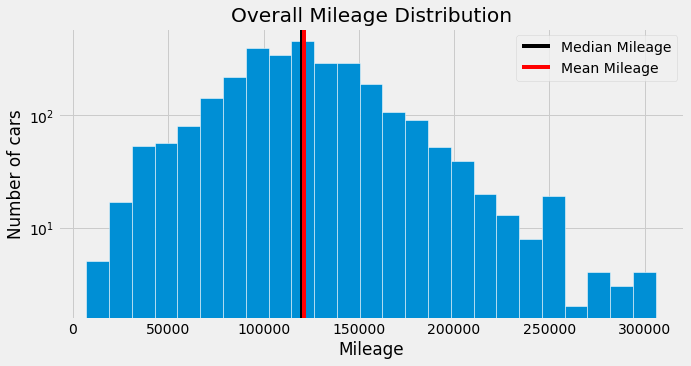

In [17]:
# Mileage
pct99 = df['Mileage'].quantile(0.99)
filt_mil = df['Mileage']<=pct99
values = df.loc[filt_mil]['Mileage']

plt.title('Overall Mileage Distribution')
plt.xlabel('Mileage')
plt.ylabel('Number of cars')

# Add the median & mean lines
median_mil = values.median()
mean_mil = values.mean()
plt.axvline(median_mil, color='black', label= 'Median Mileage')
plt.axvline(mean_mil, color='red', label= 'Mean Mileage')

#Plot the hist
plt.legend()
plt.hist(values, bins=25, log=True, edgecolor='white')
plt.show()

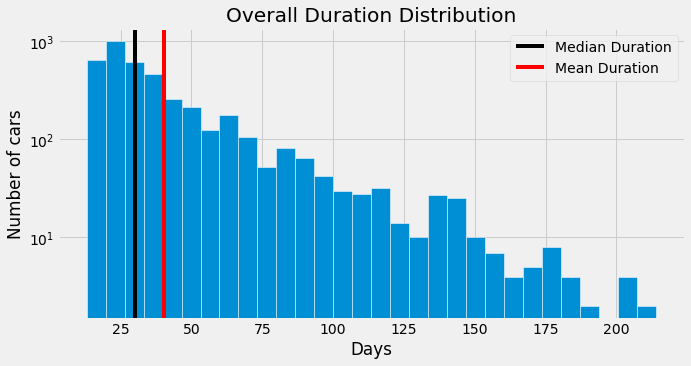

In [18]:
# duration distribution

pct99 = df['listing_duration'].quantile(0.99)
filt_mil = df['listing_duration']<=pct99
values = df.loc[filt_mil]['listing_duration']

# values = df['listing_duration']

plt.title('Overall Duration Distribution')
plt.xlabel('Days')
plt.ylabel('Number of cars')

# Add the median & mean lines
median_mil = values.median()
mean_mil = values.mean()
plt.axvline(median_mil, color='black', label= 'Median Duration')
plt.axvline(mean_mil, color='red', label= 'Mean Duration')

#Plot the hist
plt.legend()
plt.hist(values, bins=30,log=True,  edgecolor='white')
plt.show()

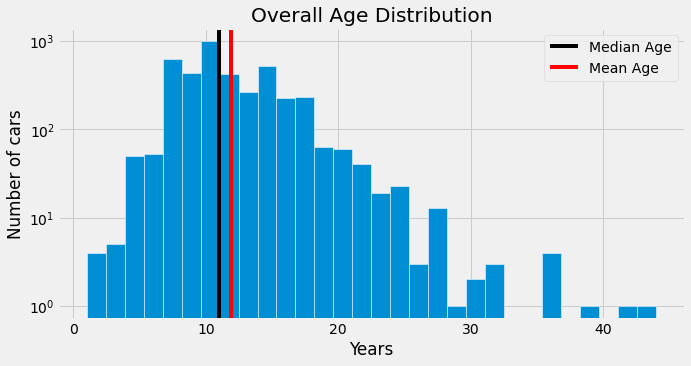

In [19]:
# Age

pct99 = df['age'].quantile(0.999)
filt_mil = df['age']<=pct99
values = df.loc[filt_mil]['age']

# values = df['listing_duration']

plt.title('Overall Age Distribution')
plt.xlabel('Years')
plt.ylabel('Number of cars')

# Add the median & mean lines
median_mil = values.median()
mean_mil = values.mean()
plt.axvline(median_mil, color='black', label= 'Median Age')
plt.axvline(mean_mil, color='red', label= 'Mean Age')

#Plot the hist
plt.legend()
plt.hist(values, bins=30,log=True,  edgecolor='white')
plt.show()

# Checking Condition

In [20]:
df_cdn= df.Condition.value_counts().rename_axis('cdn').to_frame('counts').reset_index()
df_cdn

,cdn,counts
0,Kenyan Used,4099


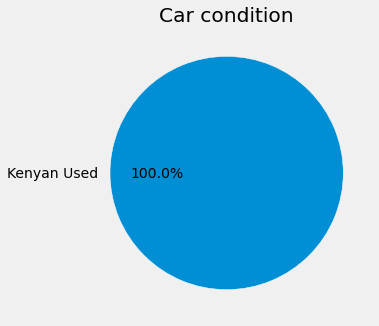

In [21]:
data= df_cdn['counts']
labels = df_cdn['cdn']
plt.title('Car condition')
plt.pie(data, labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor':'white'})
plt.show()

# Makes & Models

In [22]:
df_makes= df.Make.value_counts().rename_axis('Make').to_frame('counts').reset_index()

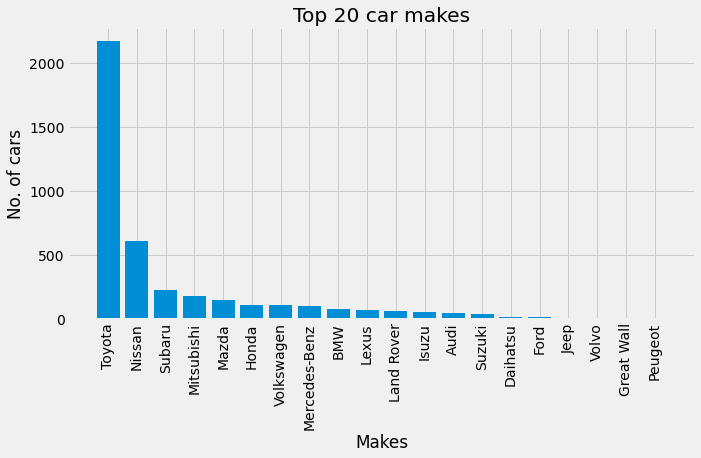

In [23]:
x=df_makes[:20]['Make']
y=df_makes[:20]['counts']

plt.xlabel('Makes')
plt.ylabel('No. of cars')
plt.title('Top 20 car makes')

# plt.yscale('log')
plt.xticks(rotation=90)
plt.bar(x, y)
plt.show()

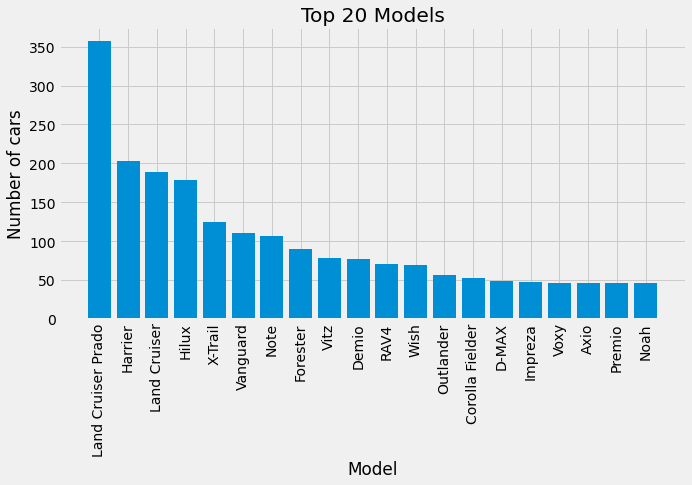

<Figure size 1296x1152 with 0 Axes>

In [24]:
#using barh to make a horizontal bar chart
df_models= df.Model.value_counts().rename_axis('Model').to_frame('Counts').reset_index()
df_models


x=df_models[:20]['Model']
y=df_models[:20]['Counts']

plt.xlabel('Model')
plt.ylabel('Number of cars')
plt.title('Top 20 Models')

plt.xticks(rotation=90)
plt.bar(x, y)

plt.figure(figsize=(18, 16))
plt.show()

# Makes: Price, age, mileage, duration Analysis

In [25]:
df.shape

(4099, 13)

In [26]:
# makes = df.

In [27]:
makes_grp = df.groupby('Make')

In [28]:
df_car_make=makes_grp['listing_duration','age', 'Mileage', 'selling_price'].mean()

C:\Users\Brian\AppData\Local\Temp\ipykernel_15748\3455017920.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_car_make=makes_grp['listing_duration','age', 'Mileage', 'selling_price'].mean()


In [29]:
df_car_make

,listing_duration,age,Mileage,selling_price
Make,,,,
Audi,47.088889,10.133333,133845.964286,2.527364e+06
BMW,44.525641,11.653846,112993.215686,2.403115e+06
Chevrolet,26.000000,10.000000,116000.000000,1.300000e+06
Chrysler,22.000000,15.000000,120000.000000,1.800000e+06
Citroen,32.500000,9.000000,130427.500000,2.200000e+06
Daihatsu,28.947368,8.210526,105586.400000,3.066579e+06
Ford,25.833333,10.500000,131091.538462,1.813333e+06
Foton,63.000000,8.000000,105025.000000,1.250000e+07
Great Wall,29.500000,8.500000,107500.000000,1.366666e+06


In [30]:
#create a df from valuecounts
# df_makes= df.Make.value_counts().rename_axis('Make').to_frame('counts').reset_index()
df_makes.set_index('Make', inplace=True)

In [31]:
df_makes.head()

,counts
Make,
Toyota,2171
Nissan,610
Subaru,229
Mitsubishi,178
Mazda,149


In [32]:
df_makes=df_makes.join(df_car_make)
df_makes

,counts,listing_duration,age,Mileage,selling_price
Make,,,,,
Toyota,2171,46.733303,12.239060,131196.955406,2.283487e+06
Nissan,610,37.054098,11.472131,132094.886473,2.350175e+06
Subaru,229,41.593886,11.890830,121850.893491,2.499100e+06
Mitsubishi,178,42.157303,13.140449,130572.569106,2.611427e+06
Mazda,149,44.395973,9.926174,103209.114286,2.256081e+06
Honda,107,32.654206,11.700935,126810.298701,1.907561e+06
Volkswagen,106,40.490566,11.537736,116999.887324,2.445179e+06
Mercedes-Benz,102,33.745098,13.705882,138986.490909,2.317529e+06
BMW,78,44.525641,11.653846,112993.215686,2.403115e+06


In [33]:
# plots for average prices
df_makes.reset_index(inplace=True)

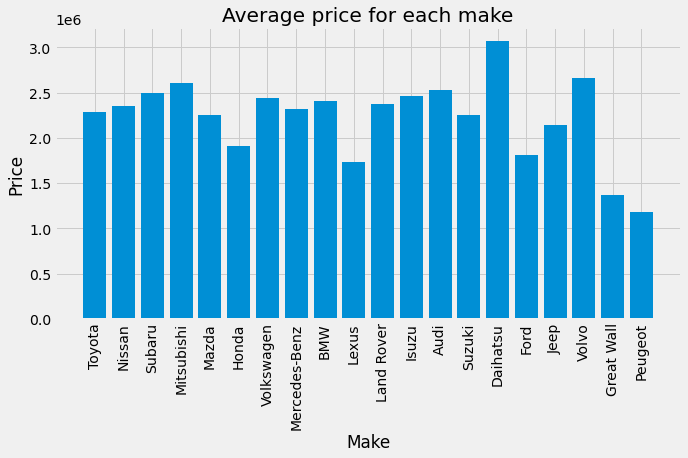

In [34]:
# plots for average prices
x= df_makes[:20]['Make']
y=df_makes[:20]['selling_price']

plt.title('Average price for each make')
plt.xlabel('Make')
plt.ylabel('Price')

plt.xticks(rotation=90)
plt.bar(x, y)

plt.show()

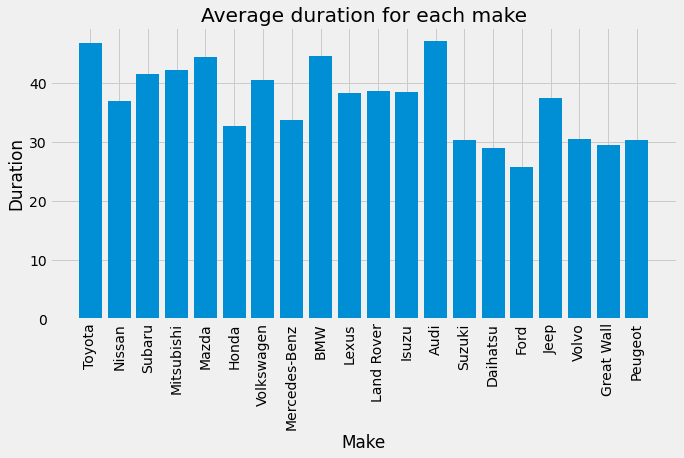

In [35]:
# plots for duration prices
x= df_makes[:20]['Make']
y=df_makes[:20]['listing_duration']

plt.title('Average duration for each make')
plt.xlabel('Make')
plt.ylabel('Duration')

plt.xticks(rotation=90)
plt.bar(x, y)

plt.show()

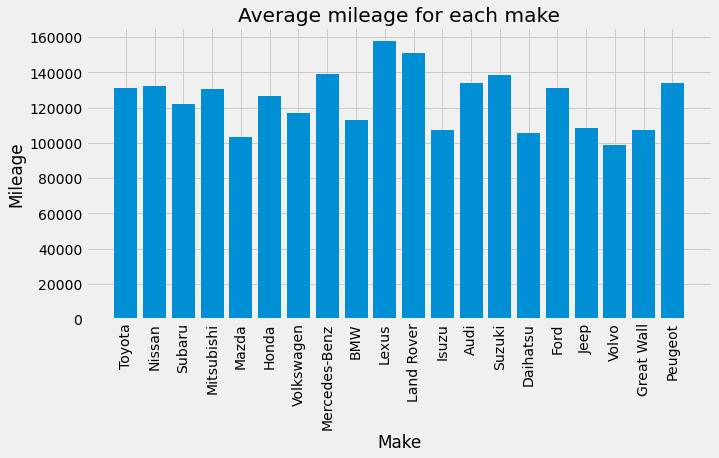

In [36]:
# plots for Mileage prices
x= df_makes[:20]['Make']
y=df_makes[:20]['Mileage']

plt.title('Average mileage for each make')
plt.xlabel('Make')
plt.ylabel('Mileage')

plt.xticks(rotation=90)
plt.bar(x, y)

plt.show()

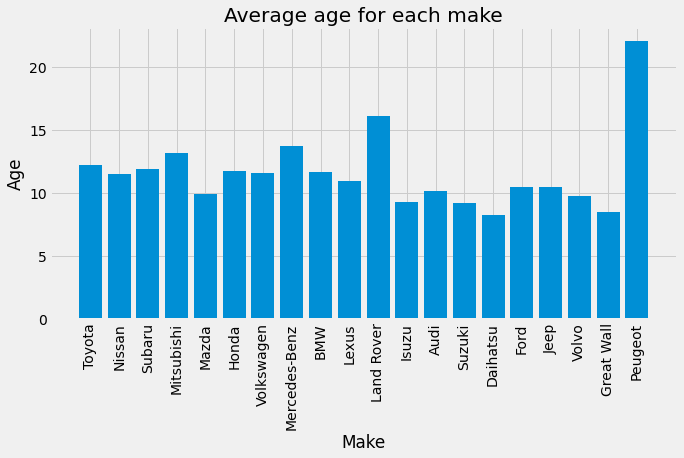

In [37]:
# plots for mean age
x= df_makes[:20]['Make']
y=df_makes[:20]['age']

plt.title('Average age for each make')
plt.xlabel('Make')
plt.ylabel('Age')

plt.xticks(rotation=90)
plt.bar(x, y)

plt.show()

# Models: Price, age, mileage & duration analysis

In [38]:
models_grp = df.groupby('Model')

In [39]:
df_car_models=models_grp['listing_duration','age', 'Mileage', 'selling_price'].mean()
df_car_models['median_price'] = models_grp['selling_price'].mean()

C:\Users\Brian\AppData\Local\Temp\ipykernel_15748\1379814304.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_car_models=models_grp['listing_duration','age', 'Mileage', 'selling_price'].mean()


In [40]:
df_car_models

,listing_duration,age,Mileage,selling_price,median_price
Model,,,,,
100,27.000000,11.000000,142000.000000,6.300000e+05,6.300000e+05
116i,46.166667,11.000000,136172.333333,1.421667e+06,1.421667e+06
1400,49.000000,25.000000,253322.000000,5.200000e+06,5.200000e+06
200,31.500000,22.000000,79850.000000,1.885000e+06,1.885000e+06
200E,34.000000,12.000000,NaN,1.945000e+06,1.945000e+06
...,...,...,...,...,...
XF,29.333333,8.000000,33000.000000,3.583333e+06,3.583333e+06
XV,33.888889,8.777778,89714.625000,2.094444e+06,2.094444e+06
Xenon,31.000000,5.000000,32590.000000,3.000000e+06,3.000000e+06


In [41]:
#creating df from valuecounts
df_models= df.Model.value_counts().rename_axis('Model').to_frame('Counts').reset_index()
df_models.set_index('Model', inplace=True)

In [42]:
# using join to merge two dataframes
df_models=df_models.join(df_car_models)

In [43]:
df_car_models.head()

,listing_duration,age,Mileage,selling_price,median_price
Model,,,,,
100,27.000000,11.0,142000.000000,6.300000e+05,6.300000e+05
116i,46.166667,11.0,136172.333333,1.421667e+06,1.421667e+06
1400,49.000000,25.0,253322.000000,5.200000e+06,5.200000e+06
200,31.500000,22.0,79850.000000,1.885000e+06,1.885000e+06
200E,34.000000,12.0,NaN,1.945000e+06,1.945000e+06


In [58]:
df.loc[df['Model']=='Vitz']

,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,selling_price,day,boost,date,listing_duration,age
50,Kenyan Used,Toyota,Vitz,2014.0,Purple,Automatic,31000.0,1535000.0,Tue,{},2022-07-26 10:41:43,21.0,8.0
99,Kenyan Used,Toyota,Vitz,2009.0,Silver,Automatic,118000.0,4100000.0,Tue,Diamond,2022-08-02 11:30:41,14.0,13.0
139,Kenyan Used,Toyota,Vitz,2011.0,White,Automatic,103571.0,1430000.0,Tue,VIP TOP+,2022-07-19 07:50:51,28.0,11.0
219,Kenyan Used,Toyota,Vitz,2009.0,Silver,Automatic,118000.0,1290000.0,Tue,Diamond,2022-08-02 11:30:41,14.0,13.0
302,Kenyan Used,Toyota,Vitz,2011.0,White,Automatic,139021.0,2670000.0,Tue,Diamond,2022-07-19 09:36:13,28.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15866,Kenyan Used,Toyota,Vitz,2009.0,Silver,Automatic,NaN,750000.0,Wed,VIP TOP+,2022-07-20 14:43:43,27.0,13.0
17446,Kenyan Used,Toyota,Vitz,2012.0,Silver,Automatic,NaN,3000000.0,Wed,VIP TOP+,2022-07-27 18:47:55,19.0,10.0
17547,Kenyan Used,Toyota,Vitz,2012.0,Red,Automatic,134000.0,4300000.0,Wed,VIP TOP+,2022-07-27 11:49:14,20.0,10.0
17578,Kenyan Used,Toyota,Vitz,2010.0,Beige,Automatic,126000.0,2400000.0,Thu,VIP TOP+,2022-07-28 06:08:33,19.0,12.0


In [56]:
df_models.head(20)

,Model,Counts,listing_duration,age,Mileage,selling_price,median_price
0,Land Cruiser Prado,357,47.274510,12.717087,129826.654902,2.471580e+06,2.471580e+06
1,Harrier,203,64.783251,12.399015,113883.849315,2.248685e+06,2.248685e+06
2,Land Cruiser,189,47.603175,12.518519,147980.331034,2.415153e+06,2.415153e+06
3,Hilux,178,56.707865,10.808989,123704.779310,2.362331e+06,2.362331e+06
4,X-Trail,124,40.088710,13.556452,131187.453608,2.294444e+06,2.294444e+06
5,Vanguard,111,76.153153,11.387387,114115.358696,2.068324e+06,2.068324e+06
6,Note,107,34.766355,9.056075,121242.205479,2.258252e+06,2.258252e+06
7,Forester,90,44.266667,12.422222,120063.454545,2.525656e+06,2.525656e+06
8,Vitz,78,26.653846,10.705128,120435.963636,2.202564e+06,2.202564e+06
9,Demio,77,38.714286,10.012987,106220.849057,2.266351e+06,2.266351e+06


In [45]:
df_models.head()

,Counts,listing_duration,age,Mileage,selling_price,median_price
Model,,,,,,
Land Cruiser Prado,357,47.274510,12.717087,129826.654902,2.471580e+06,2.471580e+06
Harrier,203,64.783251,12.399015,113883.849315,2.248685e+06,2.248685e+06
Land Cruiser,189,47.603175,12.518519,147980.331034,2.415153e+06,2.415153e+06
Hilux,178,56.707865,10.808989,123704.779310,2.362331e+06,2.362331e+06
X-Trail,124,40.088710,13.556452,131187.453608,2.294444e+06,2.294444e+06


In [46]:
df_models.reset_index(inplace=True)

In [47]:
def plot_model_bars(parameter):
    x= df_models[:30]['Model']
    y=df_models[:30][parameter]

    plt.title(f'Average {parameter} for each model')
    plt.xlabel('Model')
    plt.ylabel(parameter)

    plt.xticks(rotation=90)
    plt.bar(x, y)

    plt.show()

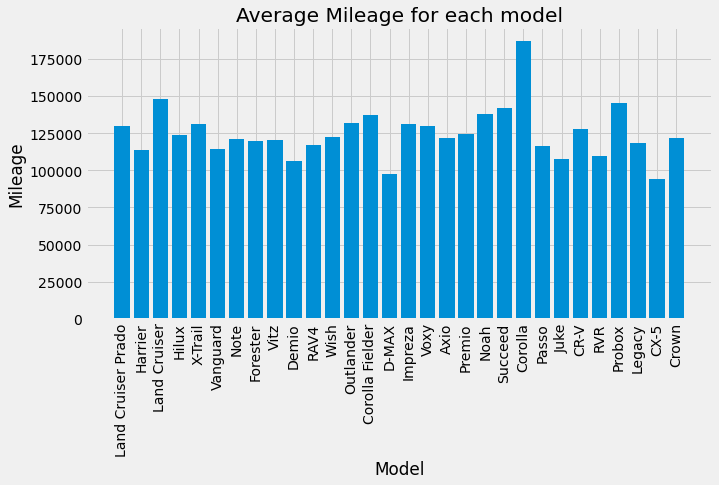

In [48]:
plot_model_bars('Mileage')

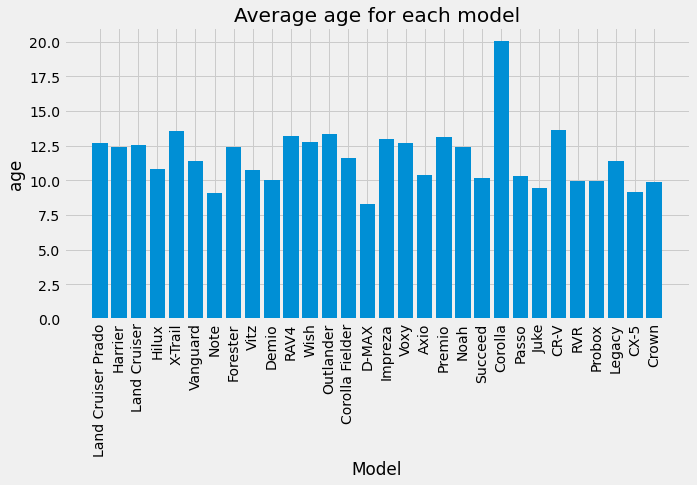

In [49]:
plot_model_bars('age')

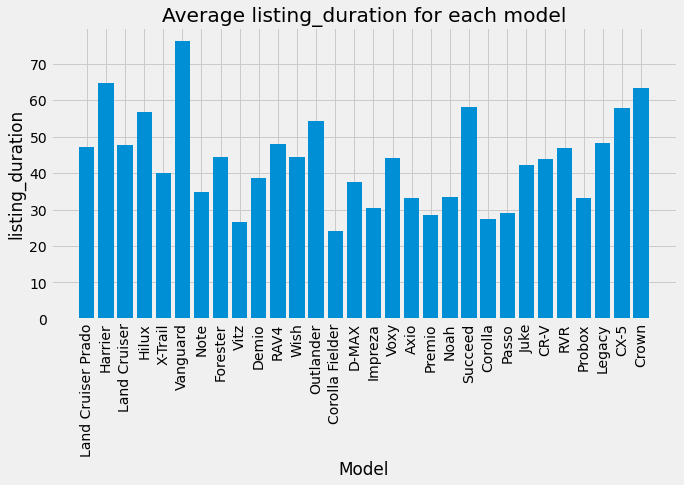

In [50]:
plot_model_bars('listing_duration')

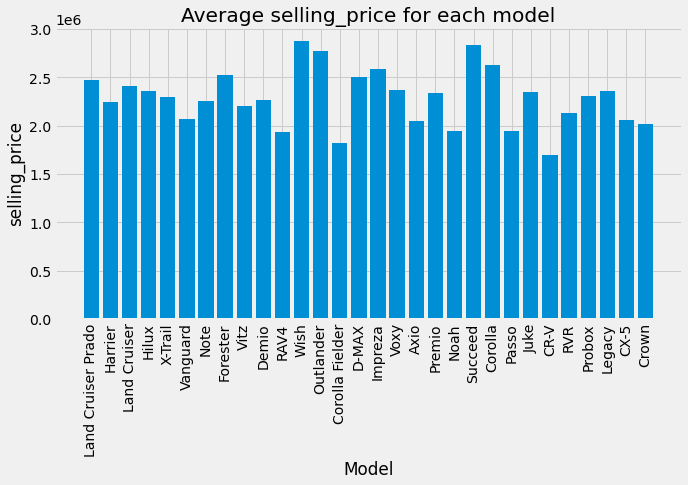

In [51]:
plot_model_bars('selling_price')

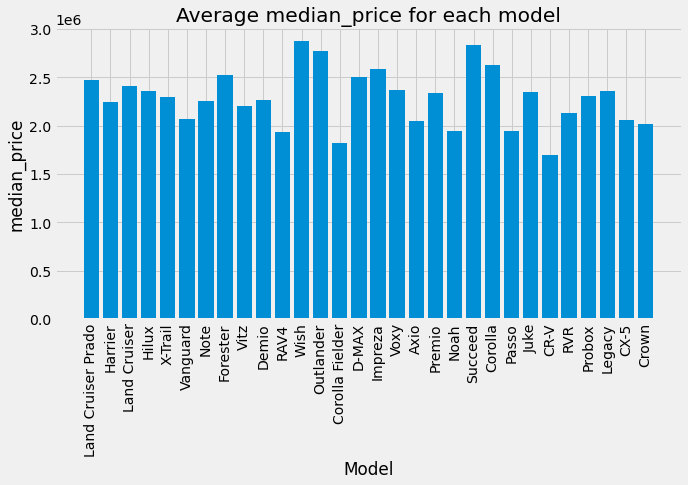

In [52]:
plot_model_bars('median_price')

In [55]:
filt_note = df['Model']=='Axio'
df.loc[filt_note]['selling_price'].min()

215000.0